Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_109 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


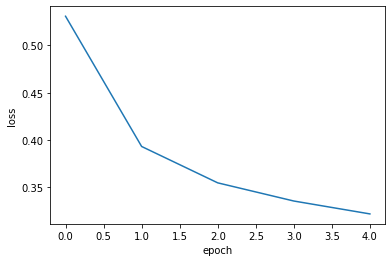

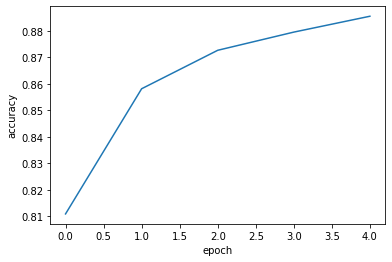

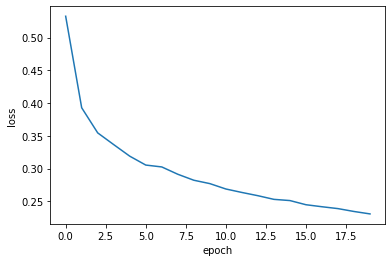

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


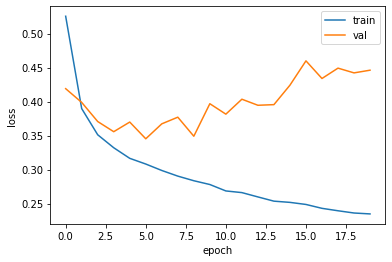

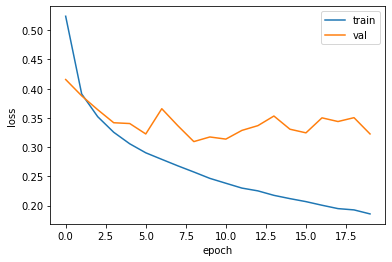

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_59 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 100)               78500     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


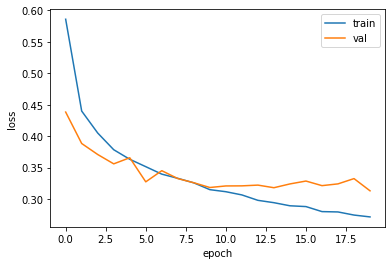

-rw-r--r-- 1 root root 981736 Jul 26 03:44 best-model.h5
-rw-r--r-- 1 root root 332480 Jul 26 04:01 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 26 04:01 model-whole.h5
375/375 [==============================] - 0s 863us/step - loss: 0.3145 - accuracy: 0.8882
10


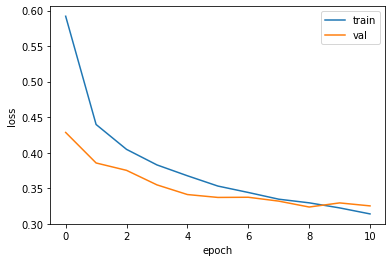

375/375 [==============================] - 0s 863us/step - loss: 0.3235 - accuracy: 0.8821


[0.32354238629341125, 0.8820833563804626]

In [24]:
#손실 곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#검증손실
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data = (val_scaled, val_target))

model.save_weights('model-weights.h5')

model.save('model-whole.h5')

!ls -al *.h5

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np

def accuracy_fn(model, x, y):#
  labels = np.argmax(model.predict(x), axis=-1)#
  return np.mean(labels == y)#

accuracy_fn(model, val_scaled, val_target)#

model = keras.models.load_model('model-whole.h5')#

#accuracy_fn(model, val_scaled, val_target)
"""
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

model = keras.models.load_model('model-whole.h5')
"""
model.evaluate(val_scaled, val_target)

#콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

model = keras.models.load_model('best-model.h5')

#accuracy_fn(model, val_scaled, val_target)
model.evaluate(val_scaled, val_target)

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

model.evaluate(val_scaled,val_target)